Constained MOD
==============

This example demonstrates the use of [pgm.cmod.CnstrMOD](http://sporco.rtfd.org/en/latest/modules/sporco.pgm.cmod.html#sporco.pgm.cmod.CnstrMOD) for computing a dictionary update via a constrained variant of the method of optimal directions [[19]](http://sporco.rtfd.org/en/latest/zreferences.html#engan-1999-method). It also illustrates the use of [pgm.backtrack.BacktrackRobust](http://sporco.rtfd.org/en/latest/modules/sporco.pgm.backtrack.html#sporco.pgm.backtrack.BacktrackRobust), [pgm.stepsize.StepSizePolicyCauchy](http://sporco.rtfd.org/en/latest/modules/sporco.pgm.stepsize.html#sporco.pgm.stepsize.StepSizePolicyCauchy) and [pgm.stepsize.StepSizePolicyBB](http://sporco.rtfd.org/en/latest/modules/sporco.pgm.stepsize.html#sporco.pgm.stepsize.StepSizePolicyBB) to adapt the step size parameter of PGM. This problem is mainly useful as a component within dictionary learning, but its use is demonstrated here since a user may wish to construct such objects as part of a custom dictionary learning algorithm, using [dictlrn.DictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.dictlrn.html#sporco.dictlrn.dictlrn.DictLearn).

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.pgm import bpdn
from sporco.pgm import cmod
from sporco.pgm.backtrack import BacktrackRobust
from sporco.pgm.stepsize import StepSizePolicyBB, StepSizePolicyCauchy
from sporco import util
from sporco import array
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])

Extract all 8x8 image blocks, reshape, and subtract block means.

In [3]:
S = array.extract_blocks((S1, S2, S3, S4, S5), (8, 8))
S = np.reshape(S, (np.prod(S.shape[0:2]), S.shape[2]))
S -= np.mean(S, axis=0)

Load initial dictionary.

In [4]:
D0 = util.convdicts()['G:8x8x64']
D0 = np.reshape(D0, (np.prod(D0.shape[0:2]), D0.shape[2]))

Compute sparse representation on current dictionary.

In [5]:
lmbda = 0.1
opt = bpdn.BPDN.Options({'Verbose': True, 'MaxMainIter': 50, 'L': 100,
            'Backtrack': BacktrackRobust()})
b = bpdn.BPDN(D0, S, lmbda, opt)
X = b.solve()

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------


   0  3.96e+04  3.92e+04  3.98e+03  4.20e+00  3.92e+04  4.00e+04      1  9.00e+01
   1  3.81e+04  3.73e+04  8.12e+03  8.58e+00  3.73e+04  3.80e+04      1  8.10e+01


   2  3.63e+04  3.50e+04  1.35e+04  1.01e+01  3.50e+04  3.56e+04      1  7.29e+01
   3  3.44e+04  3.24e+04  1.98e+04  1.13e+01  3.24e+04  3.30e+04      1  6.56e+01


   4  3.24e+04  2.97e+04  2.70e+04  1.22e+01  2.97e+04  3.02e+04      1  5.90e+01
   5  3.06e+04  2.71e+04  3.47e+04  1.27e+01  2.71e+04  2.75e+04      1  5.31e+01


   6  2.90e+04  2.48e+04  4.25e+04  1.29e+01  2.48e+04  2.51e+04      1  4.78e+01
   7  2.78e+04  2.28e+04  5.02e+04  1.26e+01  2.28e+04  2.30e+04      1  4.30e+01


   8  2.68e+04  2.10e+04  5.74e+04  1.21e+01  2.10e+04  2.12e+04      1  3.87e+01
   9  2.60e+04  1.96e+04  6.37e+04  1.15e+01  1.96e+04  1.97e+04      1  3.49e+01


  10  2.54e+04  1.84e+04  6.92e+04  1.10e+01  1.84e+04  1.85e+04      1  3.14e+01
  11  2.48e+04  1.75e+04  7.37e+04  1.06e+01  1.75e+04  1.75e+04      1  2.82e+01


  12  2.44e+04  1.67e+04  7.72e+04  1.04e+01  1.67e+04  1.67e+04      1  2.54e+01
  13  2.40e+04  1.60e+04  8.00e+04  1.01e+01  1.60e+04  1.61e+04      1  2.29e+01


  14  2.37e+04  1.55e+04  8.21e+04  9.96e+00  1.55e+04  1.56e+04      1  2.06e+01
  15  2.35e+04  1.51e+04  8.38e+04  9.77e+00  1.51e+04  1.51e+04      1  1.85e+01


  16  2.32e+04  1.47e+04  8.51e+04  9.61e+00  1.47e+04  1.48e+04      1  1.67e+01
  17  2.30e+04  1.44e+04  8.62e+04  9.46e+00  1.44e+04  1.45e+04      1  1.50e+01


  18  2.29e+04  1.42e+04  8.70e+04  9.33e+00  1.42e+04  1.42e+04      1  1.35e+01
  19  2.27e+04  1.40e+04  8.76e+04  9.19e+00  1.40e+04  1.40e+04      1  1.22e+01


  20  2.26e+04  1.38e+04  8.81e+04  9.04e+00  1.38e+04  1.38e+04      1  1.09e+01
  21  2.25e+04  1.36e+04  8.84e+04  8.88e+00  1.36e+04  1.37e+04      1  9.85e+00


  22  2.24e+04  1.35e+04  8.87e+04  8.71e+00  1.35e+04  1.36e+04      1  8.86e+00
  23  2.23e+04  1.34e+04  8.88e+04  8.51e+00  1.34e+04  1.35e+04      1  7.98e+00


  24  2.23e+04  1.34e+04  8.89e+04  8.29e+00  1.34e+04  1.34e+04      1  7.18e+00
  25  2.22e+04  1.33e+04  8.90e+04  8.05e+00  1.33e+04  1.33e+04      1  6.46e+00


  26  2.22e+04  1.33e+04  8.90e+04  7.79e+00  1.33e+04  1.33e+04      1  5.81e+00
  27  2.21e+04  1.32e+04  8.91e+04  7.50e+00  1.32e+04  1.32e+04      1  5.23e+00


  28  2.21e+04  1.32e+04  8.91e+04  7.18e+00  1.32e+04  1.32e+04      1  4.71e+00
  29  2.21e+04  1.32e+04  8.91e+04  6.84e+00  1.32e+04  1.32e+04      1  4.24e+00


  30  2.21e+04  1.32e+04  8.91e+04  6.47e+00  1.32e+04  1.32e+04      1  3.82e+00
  31  2.21e+04  1.32e+04  8.91e+04  6.09e+00  1.32e+04  1.32e+04      1  3.43e+00


  32  2.21e+04  1.31e+04  8.91e+04  5.69e+00  1.31e+04  1.31e+04      1  3.09e+00
  33  2.20e+04  1.31e+04  8.91e+04  5.28e+00  1.31e+04  1.31e+04      1  2.78e+00


  34  2.20e+04  1.31e+04  8.91e+04  4.87e+00  1.31e+04  1.31e+04      1  2.50e+00


  35  2.20e+04  1.31e+04  8.91e+04  3.42e+00  1.31e+04  1.31e+04      2  4.51e+00
  36  2.20e+04  1.31e+04  8.91e+04  2.89e+00  1.31e+04  1.31e+04      1  4.06e+00


  37  2.20e+04  1.31e+04  8.91e+04  2.08e+00  1.31e+04  1.31e+04      2  7.30e+00
  38  2.20e+04  1.31e+04  8.91e+04  1.88e+00  1.31e+04  1.31e+04      1  6.57e+00


  39  2.20e+04  1.31e+04  8.91e+04  1.81e+00  1.31e+04  1.31e+04      1  5.91e+00


  40  2.20e+04  1.31e+04  8.90e+04  1.77e+00  1.31e+04  1.31e+04      1  5.32e+00
  41  2.20e+04  1.31e+04  8.90e+04  1.73e+00  1.31e+04  1.31e+04      1  4.79e+00


  42  2.20e+04  1.31e+04  8.90e+04  1.68e+00  1.31e+04  1.31e+04      1  4.31e+00
  43  2.20e+04  1.31e+04  8.90e+04  1.63e+00  1.31e+04  1.31e+04      1  3.88e+00


  44  2.20e+04  1.31e+04  8.90e+04  1.58e+00  1.31e+04  1.31e+04      1  3.49e+00
  45  2.20e+04  1.31e+04  8.90e+04  1.52e+00  1.31e+04  1.31e+04      1  3.14e+00


  46  2.20e+04  1.31e+04  8.90e+04  1.08e+00  1.31e+04  1.31e+04      2  5.66e+00


  47  2.20e+04  1.31e+04  8.90e+04  9.85e-01  1.31e+04  1.31e+04      1  5.09e+00
  48  2.20e+04  1.31e+04  8.90e+04  9.69e-01  1.31e+04  1.31e+04      1  4.58e+00


  49  2.20e+04  1.31e+04  8.90e+04  9.51e-01  1.31e+04  1.31e+04      1  4.12e+00
---------------------------------------------------------------------------------


Update dictionary for training image set using PGM with Cauchy step size policy [[60]](http://sporco.rtfd.org/en/latest/zreferences.html#yuan-2008-stepsize).

In [6]:
opt = cmod.CnstrMOD.Options({'Verbose': True, 'MaxMainIter': 100, 'L': 50,
        'StepSizePolicy': StepSizePolicyCauchy()})
c1 = cmod.CnstrMOD(X, S, None, opt)
D11 = c1.solve()
print("CMOD solve time: %.2fs" % c1.timer.elapsed('solve'))

Itn   DFid      Cnstr     Rsdl    
----------------------------------
   0  1.35e+04  7.54e-07  7.94e+00
   1  4.85e+04  6.92e-07  8.91e+00
   2  1.87e+04  7.50e-07  5.84e+00
   3  1.42e+04  7.32e-07  1.98e+00


   4  1.25e+04  7.19e-07  9.50e-01


   5  1.19e+04  8.14e-07  6.70e-01
   6  1.15e+04  6.55e-07  5.04e-01
   7  1.13e+04  7.86e-07  4.55e-01
   8  1.13e+04  7.51e-07  4.08e-01


   9  1.12e+04  7.25e-07  3.87e-01


  10  1.12e+04  6.79e-07  3.74e-01
  11  1.12e+04  7.24e-07  3.68e-01
  12  1.12e+04  7.31e-07  3.64e-01
  13  1.12e+04  7.64e-07  3.61e-01


  14  1.12e+04  7.86e-07  3.60e-01


  15  1.12e+04  7.58e-07  3.59e-01
  16  1.12e+04  8.34e-07  3.59e-01
  17  1.12e+04  7.82e-07  3.60e-01
  18  1.12e+04  7.43e-07  3.62e-01


  19  1.12e+04  8.41e-07  3.64e-01


  20  1.12e+04  8.25e-07  3.66e-01
  21  1.12e+04  7.26e-07  3.68e-01
  22  1.12e+04  7.84e-07  3.70e-01
  23  1.12e+04  7.42e-07  3.71e-01


  24  1.12e+04  6.80e-07  3.73e-01


  25  1.12e+04  7.14e-07  3.74e-01
  26  1.12e+04  7.89e-07  3.75e-01
  27  1.12e+04  7.09e-07  3.76e-01
  28  1.12e+04  6.14e-07  3.77e-01


  29  1.12e+04  7.83e-07  3.77e-01


  30  1.12e+04  6.96e-07  3.78e-01
  31  1.12e+04  8.06e-07  3.79e-01
  32  1.12e+04  7.46e-07  3.80e-01
  33  1.12e+04  7.61e-07  3.80e-01


  34  1.12e+04  7.01e-07  3.81e-01


  35  1.12e+04  7.50e-07  3.82e-01
  36  1.12e+04  6.73e-07  3.82e-01
  37  1.12e+04  8.36e-07  3.83e-01
  38  1.12e+04  7.36e-07  3.84e-01


  39  1.12e+04  7.32e-07  3.84e-01


  40  1.12e+04  7.45e-07  3.85e-01
  41  1.12e+04  6.96e-07  3.85e-01
  42  1.12e+04  6.66e-07  3.85e-01
  43  1.12e+04  7.17e-07  3.86e-01


  44  1.12e+04  7.77e-07  3.86e-01


  45  1.12e+04  6.81e-07  3.86e-01
  46  1.12e+04  6.82e-07  3.87e-01
  47  1.12e+04  8.05e-07  3.87e-01
  48  1.12e+04  7.03e-07  3.87e-01


  49  1.12e+04  8.16e-07  3.88e-01


  50  1.12e+04  7.70e-07  3.88e-01
  51  1.12e+04  8.00e-07  3.88e-01
  52  1.12e+04  7.73e-07  3.88e-01
  53  1.12e+04  7.86e-07  3.89e-01


  54  1.12e+04  8.63e-07  3.89e-01


  55  1.12e+04  8.40e-07  3.89e-01
  56  1.12e+04  6.29e-07  3.89e-01
  57  1.12e+04  7.65e-07  3.90e-01
  58  1.12e+04  8.17e-07  3.90e-01


  59  1.12e+04  7.49e-07  3.90e-01


  60  1.12e+04  8.23e-07  3.90e-01
  61  1.12e+04  8.16e-07  3.90e-01
  62  1.12e+04  7.66e-07  3.91e-01
  63  1.12e+04  7.67e-07  3.91e-01


  64  1.12e+04  7.02e-07  3.91e-01


  65  1.12e+04  7.69e-07  3.91e-01
  66  1.12e+04  7.68e-07  3.91e-01
  67  1.12e+04  7.80e-07  3.91e-01
  68  1.12e+04  7.85e-07  3.92e-01


  69  1.12e+04  8.74e-07  3.92e-01


  70  1.12e+04  7.83e-07  3.92e-01
  71  1.12e+04  8.02e-07  3.92e-01
  72  1.12e+04  7.88e-07  3.92e-01
  73  1.12e+04  6.95e-07  3.92e-01


  74  1.12e+04  6.73e-07  3.92e-01


  75  1.12e+04  7.36e-07  3.93e-01
  76  1.12e+04  7.83e-07  3.93e-01
  77  1.12e+04  7.15e-07  3.93e-01
  78  1.12e+04  7.82e-07  3.93e-01


  79  1.12e+04  7.80e-07  3.93e-01


  80  1.12e+04  8.70e-07  3.93e-01
  81  1.12e+04  6.41e-07  3.93e-01
  82  1.12e+04  6.15e-07  3.93e-01
  83  1.12e+04  6.91e-07  3.93e-01


  84  1.12e+04  8.60e-07  3.94e-01


  85  1.12e+04  7.66e-07  3.94e-01
  86  1.12e+04  7.53e-07  3.94e-01
  87  1.12e+04  8.72e-07  3.94e-01
  88  1.12e+04  8.48e-07  3.94e-01


  89  1.12e+04  7.22e-07  3.94e-01


  90  1.12e+04  7.31e-07  3.94e-01
  91  1.12e+04  7.81e-07  3.94e-01
  92  1.12e+04  7.60e-07  3.94e-01
  93  1.12e+04  6.93e-07  3.94e-01


  94  1.12e+04  8.34e-07  3.94e-01


  95  1.12e+04  7.30e-07  3.95e-01
  96  1.12e+04  7.29e-07  3.95e-01
  97  1.12e+04  8.26e-07  3.95e-01
  98  1.12e+04  8.32e-07  3.95e-01


  99  1.12e+04  7.19e-07  3.95e-01
----------------------------------
CMOD solve time: 4.75s


Update dictionary for training image set using PGM with Barzilai-Borwein step size policy [[4]](http://sporco.rtfd.org/en/latest/zreferences.html#barzilai-1988-stepsize).

In [7]:
opt = cmod.CnstrMOD.Options({'Verbose': True, 'MaxMainIter': 100, 'L': 50,
        'StepSizePolicy': StepSizePolicyBB()})
c2 = cmod.CnstrMOD(X, S, None, opt)
D12 = c2.solve()
print("CMOD solve time: %.2fs" % c2.timer.elapsed('solve'))

Itn   DFid      Cnstr     Rsdl    
----------------------------------
   0  1.35e+04  7.54e-07  7.94e+00
   1  4.85e+04  6.92e-07  8.91e+00
   2  1.95e+04  6.95e-07  5.65e+00
   3  1.56e+04  7.75e-07  1.33e+00
   4  1.41e+04  6.97e-07  3.28e-01


   5  1.23e+04  7.38e-07  1.19e+00


   6  1.16e+04  8.11e-07  5.47e-01
   7  1.14e+04  7.59e-07  2.18e-01
   8  1.13e+04  8.10e-07  2.70e-01
   9  1.12e+04  8.00e-07  1.75e-01
  10  1.12e+04  8.11e-07  1.15e-01
  11  1.12e+04  7.75e-07  6.27e-02


  12  1.12e+04  7.97e-07  5.79e-02


  13  1.12e+04  6.95e-07  2.37e-01
  14  1.12e+04  7.57e-07  9.25e-02
  15  1.12e+04  8.52e-07  5.03e-02
  16  1.12e+04  7.76e-07  1.78e-02
  17  1.12e+04  7.46e-07  5.30e-02
  18  1.12e+04  7.37e-07  5.39e-02


  19  1.12e+04  8.67e-07  4.21e-02


  20  1.12e+04  7.26e-07  3.32e-02
  21  1.12e+04  7.71e-07  2.03e-02
  22  1.12e+04  7.01e-07  8.57e-03
  23  1.12e+04  6.74e-07  7.92e-02
  24  1.12e+04  8.06e-07  2.38e-02
  25  1.12e+04  7.77e-07  6.17e-03


  26  1.12e+04  7.57e-07  1.04e-01


  27  1.12e+04  6.80e-07  5.13e-02
  28  1.12e+04  7.87e-07  6.63e-03
  29  1.12e+04  8.10e-07  2.80e-02
  30  1.12e+04  6.90e-07  2.08e-02
  31  1.12e+04  6.55e-07  3.90e-03
  32  1.12e+04  8.58e-07  6.01e-02


  33  1.12e+04  7.59e-07  3.11e-02


  34  1.12e+04  7.11e-07  8.03e-03
  35  1.12e+04  7.95e-07  5.28e-02
  36  1.12e+04  6.53e-07  1.71e-02
  37  1.12e+04  7.48e-07  3.14e-03
  38  1.12e+04  5.70e-07  1.57e-02
  39  1.12e+04  7.51e-07  8.81e-03


  40  1.12e+04  6.48e-07  2.97e-03


  41  1.12e+04  6.86e-07  2.18e-02
  42  1.12e+04  7.35e-07  1.15e-02
  43  1.12e+04  8.12e-07  1.46e-03
  44  1.12e+04  7.96e-07  3.06e-02
  45  1.12e+04  8.51e-07  2.12e-02
  46  1.12e+04  7.79e-07  1.18e-02


  47  1.12e+04  8.06e-07  3.44e-03


  48  1.12e+04  8.40e-07  7.64e-03
  49  1.12e+04  8.52e-07  1.65e-03
  50  1.12e+04  7.65e-07  1.34e-02
  51  1.12e+04  7.14e-07  7.18e-03
  52  1.12e+04  6.94e-07  2.73e-04
----------------------------------
CMOD solve time: 1.64s


Display initial and final dictionaries.

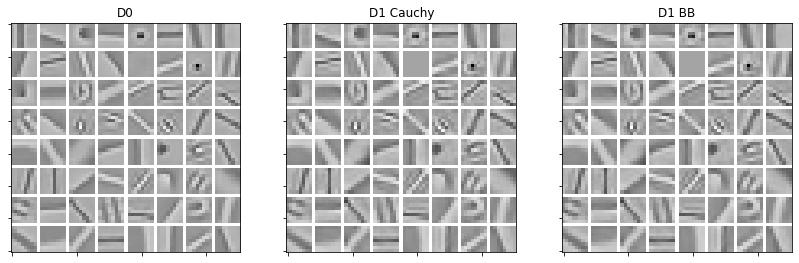

In [8]:
D0 = D0.reshape((8, 8, D0.shape[-1]))
D11 = D11.reshape((8, 8, D11.shape[-1]))
D12 = D12.reshape((8, 8, D12.shape[-1]))
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 3, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(util.tiledict(D11), title='D1 Cauchy', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(util.tiledict(D12), title='D1 BB', fig=fig)
fig.show()

Get iterations statistics from CMOD solver object and plot functional value, residuals, and automatically adjusted L against the iteration number.

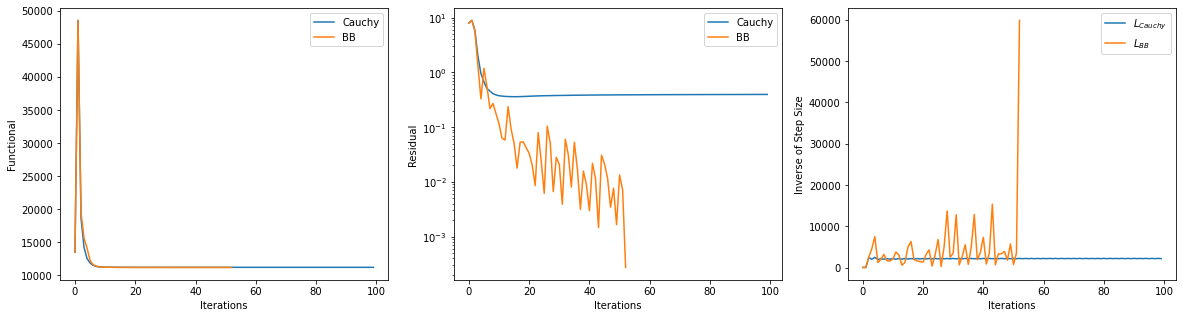

In [9]:
its1 = c1.getitstat()
its2 = c2.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its1.DFid, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.plot(its2.DFid, xlbl='Iterations', ylbl='Functional',
          lgnd=['Cauchy', 'BB'], fig=fig)
plot.subplot(1, 3, 2)
plot.plot(its1.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          fig=fig)
plot.plot(its2.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Cauchy', 'BB'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its1.L, xlbl='Iterations', ylbl='Inverse of Step Size', fig=fig)
plot.plot(its2.L, xlbl='Iterations', ylbl='Inverse of Step Size',
          lgnd=[r'$L_{Cauchy}$', '$L_{BB}$'], fig=fig)
fig.show()